<a href="https://colab.research.google.com/github/athu-lya/Assignment1/blob/main/Internship_Project_Credit_Score_Classification_Model_Development_Athulya_KM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
#checking Enviornment
print('hello world')

hello world


In [160]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

## Build a Classification model with Highest Accuracy, Precison and Recall score. Create a predictive model that categorizes customers into three creditworthiness levels: Good, Standard, and Poor with the given data.

In [161]:
#loading the dataset to the enviornment
credit=pd.read_csv('/content/credit (1).csv')

In [162]:
credit.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


#EDA(Exploratory Data Analysis)

In [163]:
credit.shape

(58016, 28)

there are 100000 rows and 28 columns in the dataset

In [164]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58016 entries, 0 to 58015
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        58016 non-null  int64  
 1   Customer_ID               58016 non-null  int64  
 2   Month                     58016 non-null  int64  
 3   Name                      58016 non-null  object 
 4   Age                       58016 non-null  float64
 5   SSN                       58016 non-null  float64
 6   Occupation                58016 non-null  object 
 7   Annual_Income             58016 non-null  float64
 8   Monthly_Inhand_Salary     58016 non-null  float64
 9   Num_Bank_Accounts         58016 non-null  float64
 10  Num_Credit_Card           58016 non-null  float64
 11  Interest_Rate             58016 non-null  float64
 12  Num_of_Loan               58016 non-null  float64
 13  Type_of_Loan              58016 non-null  object 
 14  Delay_

Dataset has 28 features and 100000 entries. Among that, 21 features are numerical (18 float and 3 integer) and 7 are categorical features.

In [165]:
credit.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,58016.000000,58016.000000,58016.000000,58016.000000,5.801600e+04,58016.000000,58016.000000,58016.000000,58016.000000,58016.000000,...,58016.000000,58016.000000,58016.000000,58016.000000,58016.000000,58015.000000,58015.000000,58015.000000,58015.000000,58015.000000
mean,49143.500000,25918.594043,4.500000,33.261859,4.993304e+08,50528.183028,4196.756259,5.367812,5.535697,14.519857,...,21.187552,13.318929,10.458324,5.805312,1427.035940,32.310687,221.640334,108.442761,54.940339,392.395590
std,25121.881288,14333.345321,2.291308,10.697824,2.909609e+08,38462.248406,3197.963128,2.595318,2.061955,8.754510,...,14.803850,6.256664,6.631903,3.876718,1162.440911,5.113530,100.056174,134.820140,38.678728,201.416546
min,5634.000000,1006.000000,1.000000,14.000000,4.033120e+05,7005.930000,319.556250,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.500000,0.000000,0.540000,20.000000,1.000000,0.000000,0.000000,0.088628
25%,27388.750000,13849.500000,2.750000,25.000000,2.434655e+08,19324.187500,1623.593333,3.000000,4.000000,7.000000,...,10.000000,9.000000,5.340000,3.000000,566.072500,28.076496,144.000000,29.876241,27.816057,267.786613
50%,49143.500000,25654.000000,4.500000,33.000000,4.995090e+08,36916.420000,3081.243333,6.000000,5.000000,13.000000,...,18.000000,14.000000,9.380000,5.000000,1155.950000,32.344121,220.000000,66.506180,45.113846,333.706223
75%,70898.250000,38259.250000,6.250000,41.000000,7.529645e+08,71609.640000,5948.160000,7.000000,7.000000,20.000000,...,28.000000,18.000000,14.860000,9.000000,1942.100000,36.526191,303.000000,147.522503,71.219513,461.916744
max,92653.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15136.696667,10.000000,11.000000,34.000000,...,62.000000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [166]:
credit.dtypes

,0
ID,int64
Customer_ID,int64
Month,int64
Name,object
Age,float64
SSN,float64
Occupation,object
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,float64


In [167]:
credit.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [168]:
#check for duplicates
credit.duplicated().sum()

0

there is no duplicates in the dataset

In [169]:
#chech for unique values
(credit.nunique()).sort_values(ascending=False)

,0
ID,58016
Credit_Utilization_Ratio,58015
Monthly_Balance,57132
Monthly_Inhand_Salary,7688
Customer_ID,7252
SSN,7252
Annual_Income,7250
Outstanding_Debt,7146
Amount_invested_monthly,7116
Total_EMI_per_month,6909


Feature 'ID' and ''Credit_Utilization_Ratio' have full of unique values

In [170]:
credit.drop(['ID','Customer_ID','Month','Name','SSN','Occupation','Type_of_Loan','Credit_Utilization_Ratio'],axis=1,inplace=True)

droped some unnecessary features by assuming that they don’t have any predictive power to predict the target variable.

In [171]:
#check for null values
credit.isnull().sum()

,0
Age,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


There is no null values in the dataset

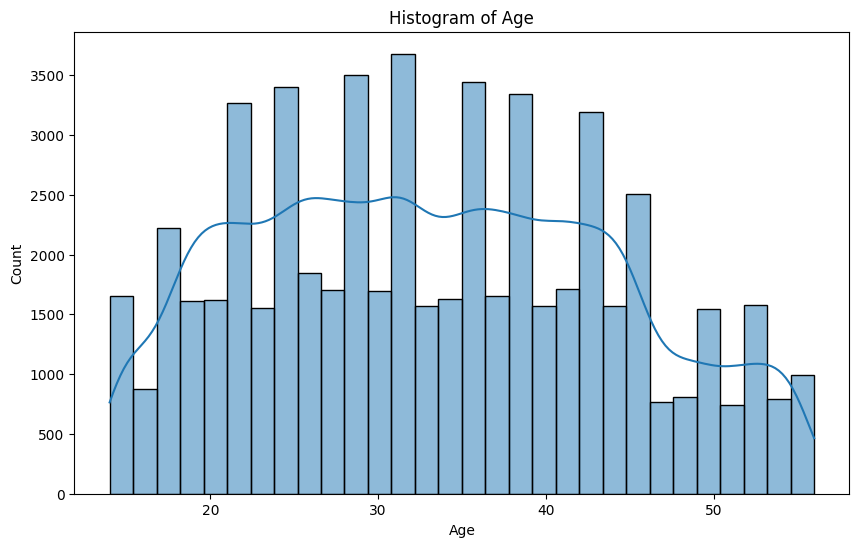

In [172]:
#Visualization
plt.figure(figsize=(10, 6))
sns.histplot(credit['Age'], kde=True, bins=30)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

<ipython-input-173-ccb554c81998>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = credit['Credit_Mix'],palette = "colorblind");


([0, 1, 2], [Text(0, 0, 'Good'), Text(1, 0, 'Standard'), Text(2, 0, 'Bad')])

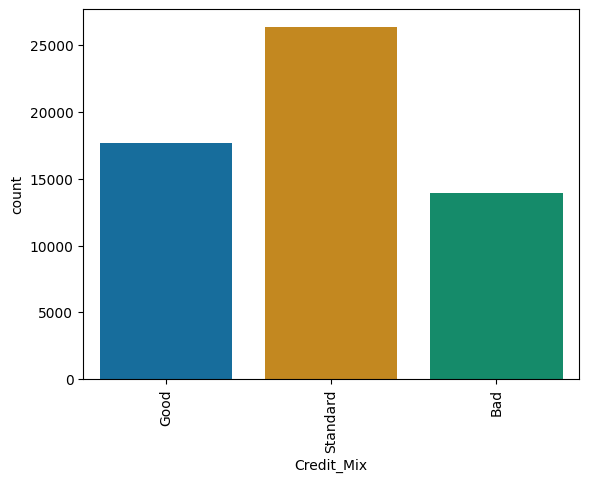

In [173]:
sns.countplot(x = credit['Credit_Mix'],palette = "colorblind");
plt.xticks(rotation = 90)

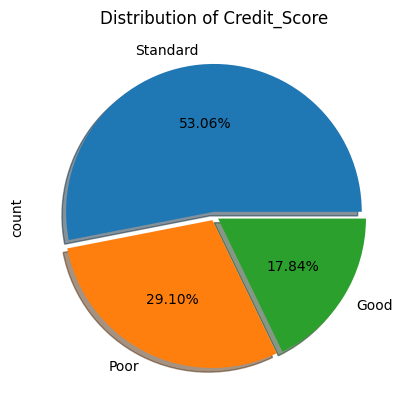

In [174]:
credit["Credit_Score"].value_counts().plot.pie(explode = [0.03,0.03,0.03], autopct="%1.2f%%",shadow = True,labels = ["Standard","Poor","Good"])
plt.title('Distribution of Credit_Score')
plt.show()

Data is imbalanced since the majority lies in 'standard' i.e, 53.17%, 29% in 'poor' and less in 'good'(17.83%)

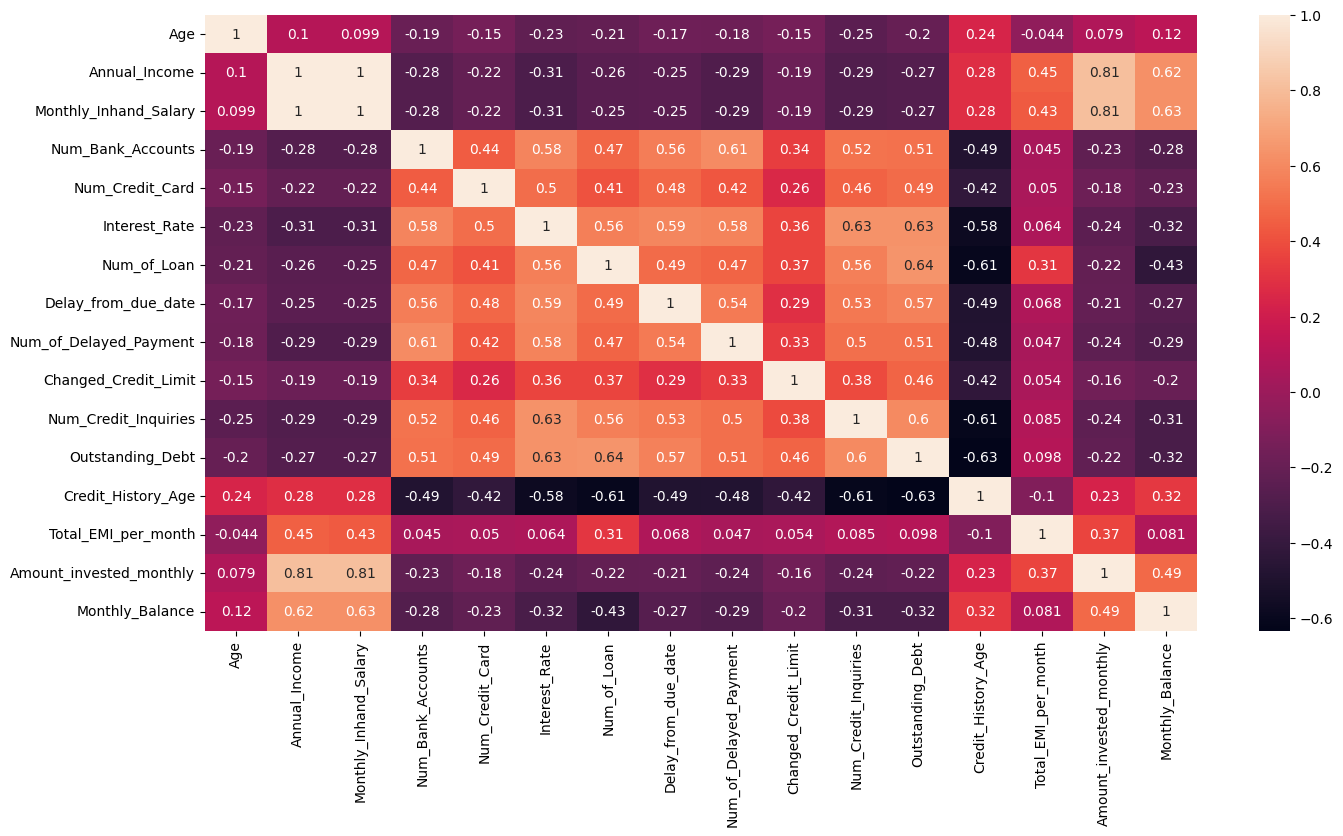

In [175]:
#Correlation
plt.figure(figsize=(16, 8))
sns.heatmap(credit.select_dtypes(include="number").corr(),annot=True)
plt.show()

'Annual_Income' and 'Monthly_Inhand_Salary' have correlation 1

#**Outlier detection and treatment**

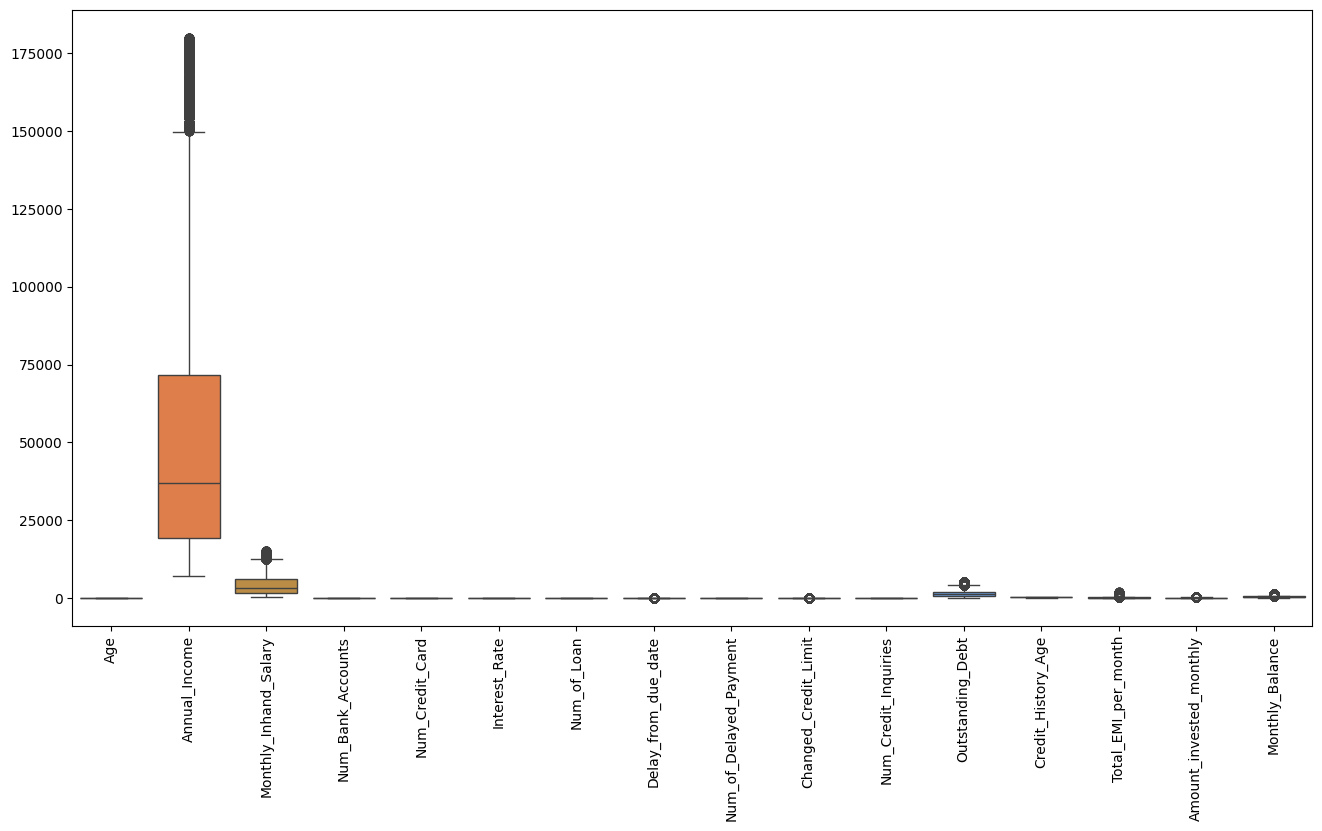

In [176]:
#check for outliers
plt.figure(figsize=(16, 8))
sns.boxplot(credit)
plt.xticks(rotation=90)
plt.show()

there are outliers present in the dataset

In [177]:
new_columns=['Annual_Income','Monthly_Inhand_Salary','Delay_from_due_date', 'Changed_Credit_Limit','Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month','Amount_invested_monthly', 'Monthly_Balance']

In [178]:
for i in new_columns:
    print('Skewness of feature',i,':',credit[i].skew())

Skewness of feature Annual_Income : 1.1364845226806615
Skewness of feature Monthly_Inhand_Salary : 1.1322583974195277
Skewness of feature Delay_from_due_date : 0.9574103561626118
Skewness of feature Changed_Credit_Limit : 0.7218530571598748
Skewness of feature Num_Credit_Inquiries : 0.41607815297727035
Skewness of feature Outstanding_Debt : 1.2090909475188627
Skewness of feature Total_EMI_per_month : 4.1688706165612865
Skewness of feature Amount_invested_monthly : 1.7004352516167347
Skewness of feature Monthly_Balance : 1.3605710109731635


All 9 features having outliers are skewed distributions. So using IQR (Inter Quartile Range) method for outlier detection and clip function for outlier treatment.

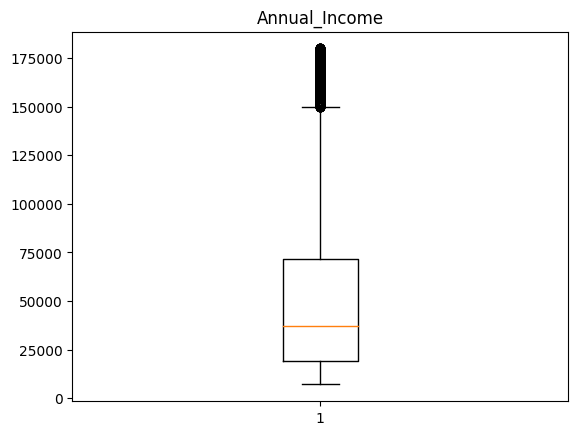

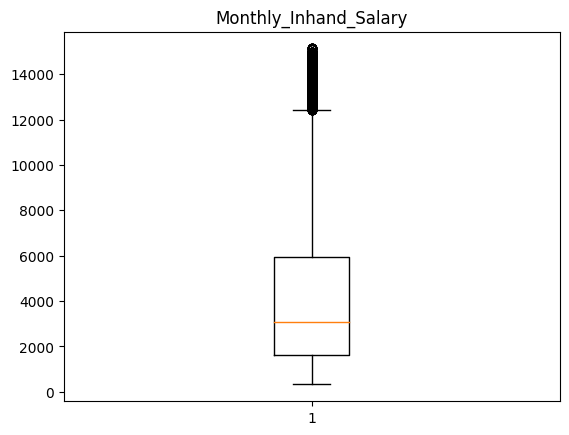

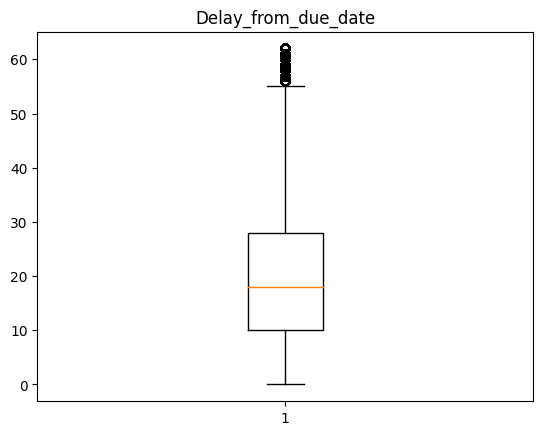

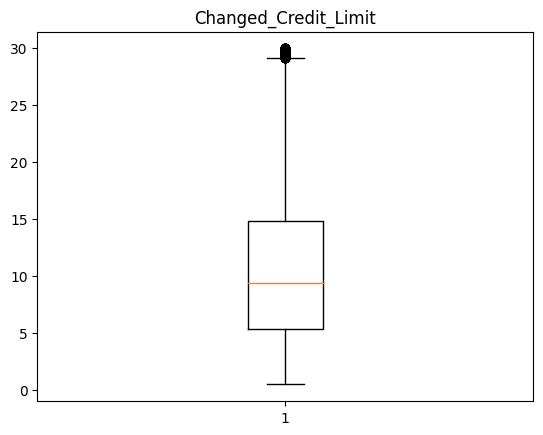

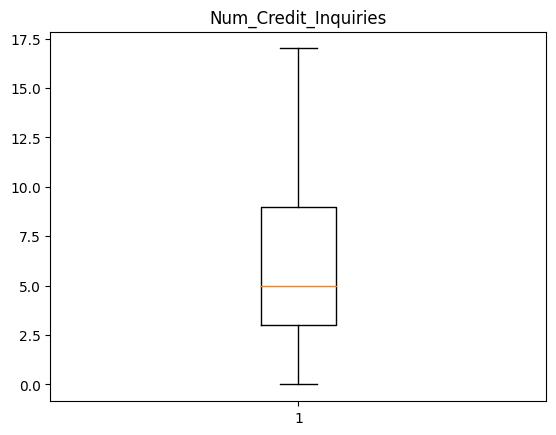

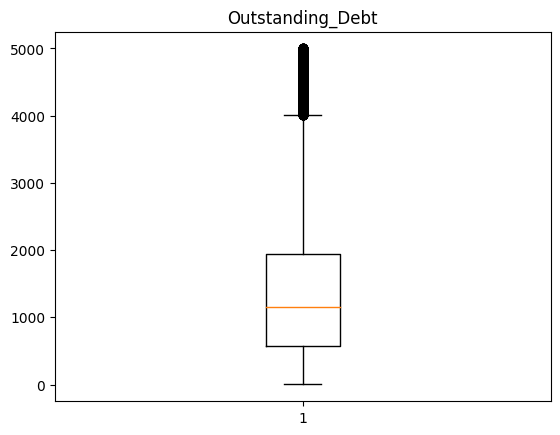

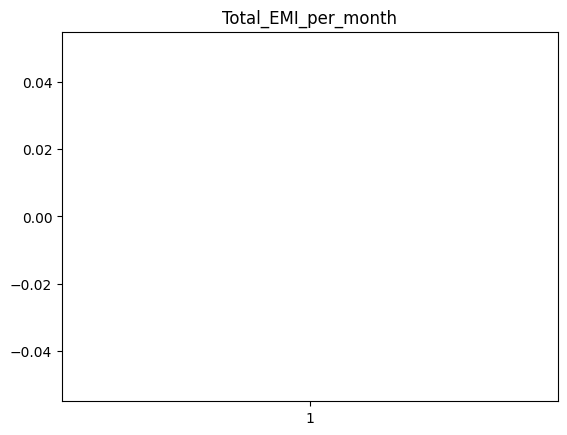

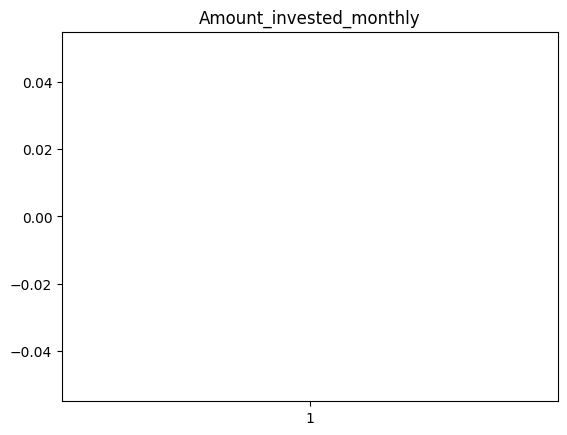

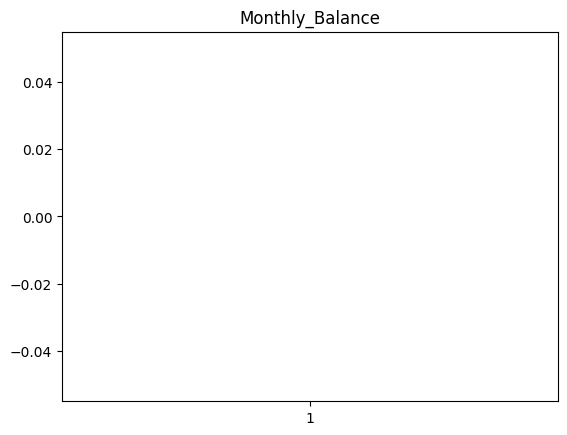

In [179]:
for i in new_columns:
  plt.figure(i)
  plt.boxplot(credit[i])
  plt.title(i);

In [180]:
for j in ['Annual_Income','Monthly_Inhand_Salary','Delay_from_due_date', 'Changed_Credit_Limit','Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month','Amount_invested_monthly', 'Monthly_Balance']:
    Q1=np.percentile(credit[j],25,method='midpoint')
    Q2=np.percentile(credit[j],50,method='midpoint')
    Q3=np.percentile(credit[j],75,method='midpoint')
    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR
    outliers = []
    for h in credit[j]:
        if ((h < low_lim) | (h > up_lim)):
            outliers.append(h)
    credit[j]=credit[j].clip(lower=low_lim,upper=up_lim)

In [181]:
new_columns1=['Annual_Income','Monthly_Inhand_Salary','Delay_from_due_date', 'Changed_Credit_Limit','Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month','Amount_invested_monthly', 'Monthly_Balance']

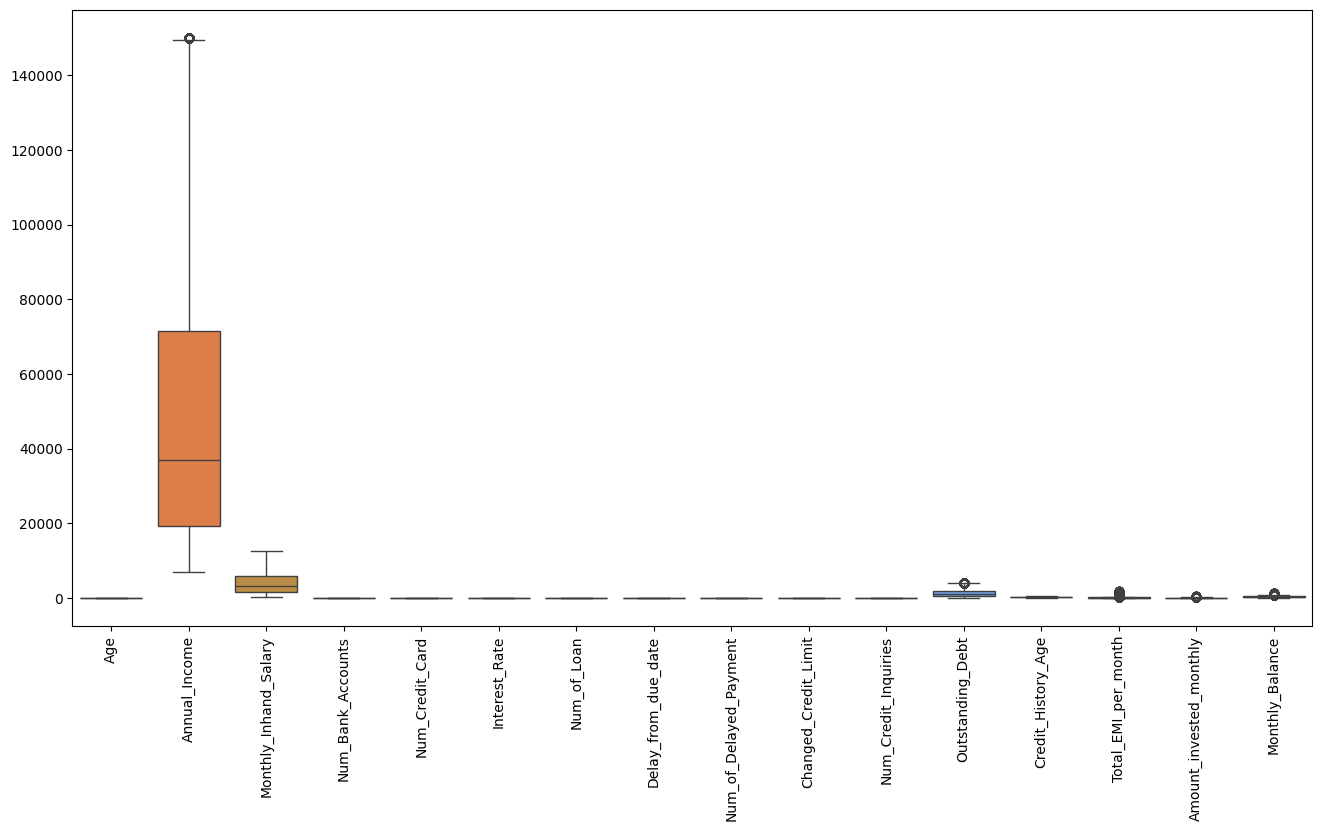

In [182]:
plt.figure(figsize=(16, 8))
sns.boxplot(credit)
plt.xticks(rotation=90)
plt.show()

All outliers are treated properly. The remaining outliers are the outliers of newly transformed data.

In [183]:
credit.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [184]:
#Label encoding
le = LabelEncoder()
cat_columns=['Credit_Mix','Credit_History_Age','Payment_of_Min_Amount','Credit_Score']
for i in cat_columns:
    credit[i]=le.fit_transform(credit[i])

In [185]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58016 entries, 0 to 58015
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      58016 non-null  float64
 1   Annual_Income            58016 non-null  float64
 2   Monthly_Inhand_Salary    58016 non-null  float64
 3   Num_Bank_Accounts        58016 non-null  float64
 4   Num_Credit_Card          58016 non-null  float64
 5   Interest_Rate            58016 non-null  float64
 6   Num_of_Loan              58016 non-null  float64
 7   Delay_from_due_date      58016 non-null  float64
 8   Num_of_Delayed_Payment   58016 non-null  float64
 9   Changed_Credit_Limit     58016 non-null  float64
 10  Num_Credit_Inquiries     58016 non-null  float64
 11  Credit_Mix               58016 non-null  int64  
 12  Outstanding_Debt         58016 non-null  float64
 13  Credit_History_Age       58016 non-null  int64  
 14  Payment_of_Min_Amount 

In [186]:
#ordinal encoding
credit['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments', nan], dtype=object)

In [188]:
#ordinal encoding
Payment_Behaviour_cat=['Low_spent_Small_value_payments','Low_spent_Medium_value_payments','Low_spent_Large_value_payments',
                          'High_spent_Small_value_payments','High_spent_Medium_value_payments','High_spent_Large_value_payments']
Payment_Behaviour_encoder=OrdinalEncoder(categories=[Payment_Behaviour_cat],handle_unknown='use_encoded_value', unknown_value=np.nan) # Handle unknown values by encoding them as np.nan
credit['Payment_Behaviour']=Payment_Behaviour_encoder.fit_transform(credit[['Payment_Behaviour']])

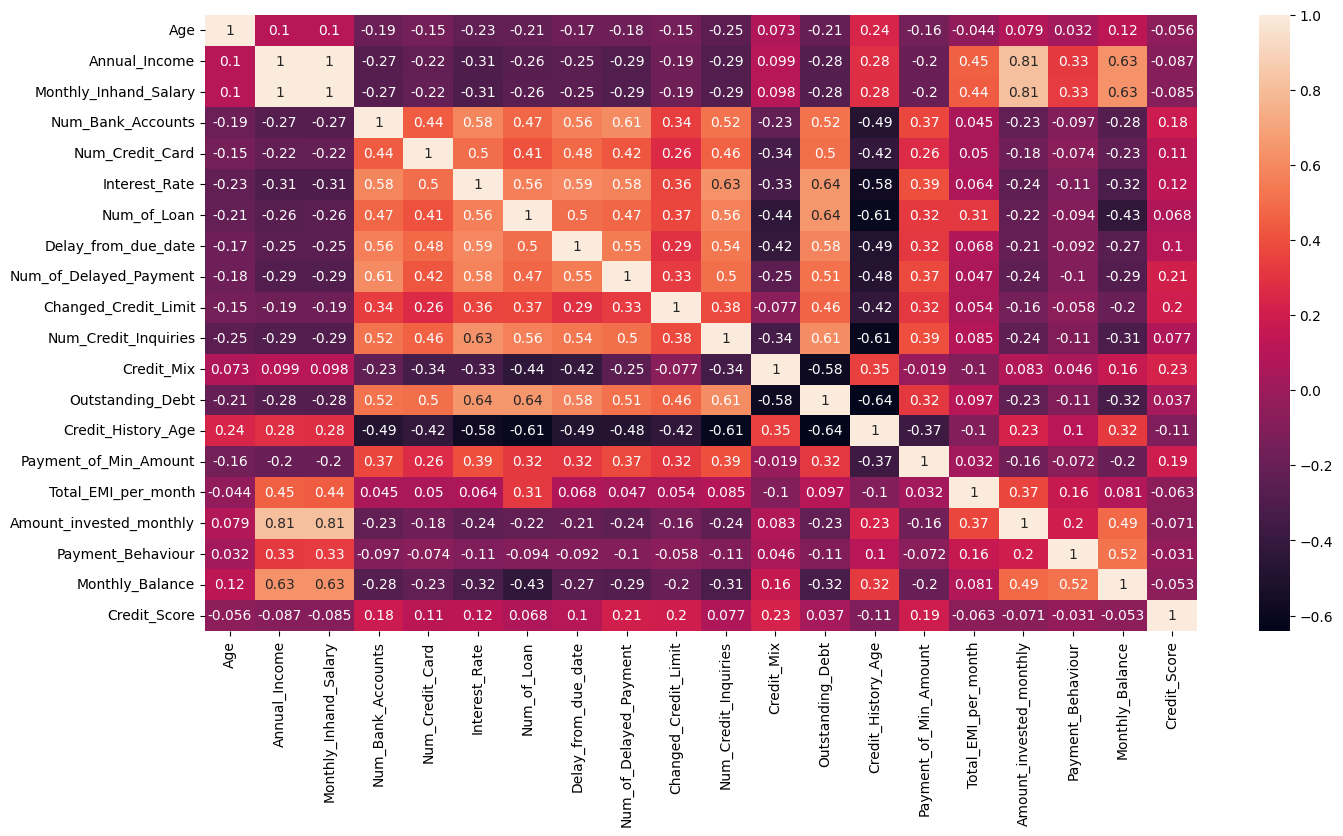

In [189]:
plt.figure(figsize=(16, 8))
sns.heatmap(credit.corr(),annot=True)
plt.show()

Since the correlation value of 'Annual_Income' and 'Monthly_Inhand_Salary' are one, they are highly correlated. so that droping 'Monthly_Inhand_Salary'.

In [190]:
credit.drop('Monthly_Inhand_Salary',axis=1,inplace=True)

In [191]:
credit.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1,809.98,264,1,49.574949,21.46538,3.0,312.494089,0
1,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,1,809.98,265,1,49.574949,21.46538,2.0,284.629162,0
2,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1,809.98,266,1,49.574949,21.46538,1.0,331.209863,0
3,23.0,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,1,809.98,267,1,49.574949,21.46538,0.0,223.451310,0
4,23.0,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,1,809.98,268,1,49.574949,21.46538,4.0,341.489231,0


In [192]:
#setting the target variable and independentb variables
x=credit.drop('Credit_Score',axis=1)
y=credit['Credit_Score']
y=pd.DataFrame(y,columns=['Credit_Score'])

In [193]:
sc=StandardScaler()
x_sc=sc.fit_transform(x)
x=pd.DataFrame(x_sc,columns=x.columns)

In [194]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [195]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_val=sc.fit_transform(x_val)
x_test=sc.fit_transform(x_test)

#Modelling

Decision Trees

In [196]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
decision_tree_pred = decision_tree.predict(x_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
decision_tree_precision = precision_score(y_test, decision_tree_pred, average='macro')
decision_tree_recall = recall_score(y_test, decision_tree_pred, average='macro')
decision_tree_f1 = f1_score(y_test, decision_tree_pred, average='macro')
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,decision_tree_pred))
print("precision_score:",decision_tree_precision)
print("recall_score:",decision_tree_recall)
print("f1_score:",decision_tree_f1)

Decision Tree Accuracy: 0.7168217855911755
confusion_matrix: [[ 686   39  311]
 [  49 1169  475]
 [ 330  439 2304]]
precision_score: 0.6998459574932792
recall_score: 0.7008027849903886
f1_score: 0.7002367282253242


Random Forest

In [197]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
random_forest_pred = random_forest.predict(x_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
random_forest_precision = precision_score(y_test, random_forest_pred, average='macro')
random_forest_recall = recall_score(y_test, random_forest_pred, average='macro')
random_forest_f1 = f1_score(y_test, random_forest_pred, average='macro')
print("Random Forest Accuracy:", random_forest_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,random_forest_pred))
print("precision_score:",random_forest_precision)
print("recall_score:",random_forest_recall)
print("f1_score:",random_forest_f1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.8193726301275422
confusion_matrix: [[ 812    4  220]
 [   3 1404  286]
 [ 202  333 2538]]
precision_score: 0.8128770610819646
recall_score: 0.8129946386239552
f1_score: 0.8128537815098914


Logistic Regression

In [198]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)
logistic_reg_pred = logistic_reg.predict(x_test)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_pred)
logistic_precision = precision_score(y_test, logistic_reg_pred, average='macro')
logistic_recall = recall_score(y_test, logistic_reg_pred, average='macro')
logistic_f1 = f1_score(y_test, logistic_reg_pred, average='macro')
print("logistic_reg_accuracy:", logistic_reg_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,logistic_reg_pred))
print("precision_score:",logistic_precision)
print("recall_score:",logistic_recall)
print("f1_score:",logistic_f1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


logistic_reg_accuracy: 0.6496035849706998
confusion_matrix: [[ 588   18  430]
 [ 107  859  727]
 [ 315  436 2322]]
precision_score: 0.6346127831435718
recall_score: 0.6101881059464679
f1_score: 0.6183649622900154


SVM

In [199]:
svm = SVC()
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='macro')
svm_recall = recall_score(y_test, svm_pred, average='macro')
svm_f1 = f1_score(y_test, svm_pred, average='macro')
print("SVM Accuracy:", svm_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,svm_pred))
print("precision_score:",svm_precision)
print("recall_score:",svm_recall)
print("f1_score:",svm_f1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy: 0.7178559117545674
confusion_matrix: [[ 790   15  231]
 [ 185 1058  450]
 [ 451  305 2317]]
precision_score: 0.698208383694095
recall_score: 0.7138202538968388
f1_score: 0.6980273285541186


In [200]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Initialize Random Search
random_search = RandomizedSearchCV(estimator=logistic_reg, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(x_train, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
225 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

Best Parameters: {'solver': 'saga', 'penalty': 'none', 'C': 0.01}
Best Model: LogisticRegression(C=0.01, penalty='none', solver='saga')


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred_lg_hpt = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lg_hpt)
report = classification_report(y_test, y_pred_lg_hpt)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and validation data
x_train_imputed = imputer.fit_transform(x_train)
x_val_imputed = imputer.transform(x_val)

# Now create and fit the classifier
rf_clf1 = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features='sqrt')
rf_clf1.fit(x_train_imputed, y_train)

# Predict on the imputed validation data
rf_pred1 = rf_clf1.predict(x_val_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [212]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
# Assuming you have your original training data in x_train and y_train

smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the balanced training data and transform both training and validation data
x_train_balanced = imputer.fit_transform(x_train_balanced)
x_val_imputed = imputer.transform(x_val)

rf_clf1_b=RandomForestClassifier(n_estimators=10,criterion='gini',max_features='sqrt')
rf_clf1_b.fit(x_train_balanced, y_train_balanced)

# Predict on the imputed validation data
rf_pred1_b=rf_clf1_b.predict(x_val_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [213]:
dt_clf1=DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=200)
dt_clf1.fit(x_train, y_train)
dt_pred1=dt_clf1.predict(x_val)

In [214]:
dt_clf1_b=DecisionTreeClassifier(class_weight='balanced',criterion='entropy')
dt_clf1_b.fit(x_train_balanced, y_train_balanced)
dt_pred1_b=dt_clf1_b.predict(x_val)

In [215]:
mux = pd.MultiIndex.from_product([['Without Oversampling','With Oversampling'],['Random Forest','DecisionTree']])
Metric=['Train Accuracy','Validation Accuracy','Precision','Recall','F1 Score']
comp_table = pd.DataFrame([[rf_clf1.score(x_train,y_train),dt_clf1.score(x_train,y_train),
                            rf_clf1_b.score(x_train_balanced,y_train_balanced),dt_clf1_b.score(x_train_balanced,y_train_balanced)],
                            [accuracy_score(y_val,rf_pred1),accuracy_score(y_val,dt_pred1),
                            accuracy_score(y_val,rf_pred1_b),accuracy_score(y_val,dt_pred1_b)],
                            [precision_score(y_val,rf_pred1,average='weighted'),precision_score(y_val,dt_pred1,average='weighted'),
                            precision_score(y_val,rf_pred1_b,average='weighted'),precision_score(y_val,dt_pred1_b,average='weighted')],
                            [recall_score(y_val,rf_pred1,average='weighted'),recall_score(y_val,dt_pred1,average='weighted'),
                            recall_score(y_val,rf_pred1_b,average='weighted'),recall_score(y_val,dt_pred1_b,average='weighted')],
                            [f1_score(y_val,rf_pred1,average='weighted'),f1_score(y_val,dt_pred1,average='weighted'),
                            f1_score(y_val,rf_pred1_b,average='weighted'),f1_score(y_val,dt_pred1_b,average='weighted')]],columns=mux)
comp_table.index=Metric
comp_table

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning

Without Oversampling              With Oversampling  \
                           Random Forest DecisionTree     Random Forest   
Train Accuracy                  0.985758     1.000000          0.989876   
Validation Accuracy             0.804205     0.738366          0.746984   
Precision                       0.805983     0.738199          0.786248   
Recall                          0.804205     0.738366          0.746984   
F1 Score                        0.804359     0.738282          0.749366   

                                  
                    DecisionTree  
Train Accuracy          1.000000  
Validation Accuracy     0.590658  
Precision               0.660979  
Recall                  0.590658  
F1 Score                0.586286

In [217]:
# Import the VotingClassifier
from sklearn.ensemble import VotingClassifier

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and validation data
x_train_imputed = imputer.fit_transform(x_train)
x_val_imputed = imputer.transform(x_val)

voting_clf_hard = VotingClassifier(estimators=[('a1',rf_clf1),('a2',dt_clf1)],voting='hard')
voting_clf_hard.fit(x_train_imputed, y_train) # Use imputed x_train
pred = voting_clf_hard.predict(x_val_imputed) # Use imputed x_val

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [218]:
metric=['Train Accuracy','Validaion Accuracy','Precision','Recall','F1 Score']
models=['Random Forest','Decision Tree','Hard Voting Classifier']
table= pd.DataFrame([[rf_clf1.score(x_train, y_train),dt_clf1.score(x_train, y_train),voting_clf_hard.score(x_train, y_train)],[accuracy_score(y_val,rf_pred1),accuracy_score(y_val,dt_pred1),accuracy_score(y_val,pred)],[precision_score(y_val,rf_pred1,average='weighted'),precision_score(y_val,dt_pred1,average='weighted'),precision_score(y_val,pred,average='weighted')],[recall_score(y_val,rf_pred1,average='weighted'),recall_score(y_val,dt_pred1,average='weighted'),recall_score(y_val,pred,average='weighted')],[f1_score(y_val,rf_pred1,average='weighted'),f1_score(y_val,dt_pred1,average='weighted'),f1_score(y_val,pred,average='weighted')]],columns=models)
table.index=metric
table

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Random Forest,Decision Tree,Hard Voting Classifier
Train Accuracy,0.985758,1.000000,0.987805
Validaion Accuracy,0.804205,0.738366,0.783006
Precision,0.805983,0.738199,0.801326
Recall,0.804205,0.738366,0.783006
F1 Score,0.804359,0.738282,0.782789


In [222]:
test_pred1 = dt_clf1.predict(x_test)

metric=['Train Accuracy','Test Accuracy','Precision','Recall','F1 Score']
table= pd.DataFrame([[dt_clf1.score(x_train,y_train)],[accuracy_score(y_test,test_pred1)],[precision_score(y_test,test_pred1,average='weighted')],[recall_score(y_test,test_pred1,average='weighted')],[f1_score(y_test,test_pred1,average='weighted')]],columns=['Decision Tree'])
table.index=metric
table

,Decision Tree
Train Accuracy,1.000000
Test Accuracy,0.717339
Precision,0.716911
Recall,0.717339
F1 Score,0.716944


***Conclusion : Metric values got improved when we do modelling with selected features compared to modelling with full features. So use the selected features only for training and predict test data using the best model obtained - Decision Tree without oversampling.***

In [223]:
# Assuming you want to use the Decision Tree classifier with balanced class weights
test_pred = dt_clf1_b.predict(x_test)

In [224]:
metric=['Train Accuracy','Test Accuracy','Precision','Recall','F1 Score']
table= pd.DataFrame([[dt_clf1.score(x_train,y_train)],[accuracy_score(y_test,test_pred)],[precision_score(y_test,test_pred,average='weighted')],[recall_score(y_test,test_pred,average='weighted')],[f1_score(y_test,test_pred,average='weighted')]],columns=['Decision Tree']) #Replaced dt_clf with dt_clf1
table.index=metric
table

,Decision Tree
Train Accuracy,1.000000
Test Accuracy,0.593588
Precision,0.659472
Recall,0.593588
F1 Score,0.588725


In [225]:
from sklearn.model_selection import GridSearchCV

param_dist = { 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [20,50,100], 'criterion' :['gini', 'entropy'] }
dtree_reg = DecisionTreeClassifier()
grid_search = GridSearchCV(dtree_reg, param_grid=param_dist)
grid_search.fit(x_train, y_train)
best_params_random = grid_search.best_params_
print(f"Best Parameters for decision tree model: {best_params_random}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Best Parameters for decision tree model: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt'}


In [227]:
dt_clf1=DecisionTreeClassifier(criterion='gini',max_depth=50,max_features='log2')
dt_clf1.fit(x_train,y_train)
test_pred1=dt_clf1.predict(x_test)

metric values are good

In [228]:
#cross validation(using stratified k fold cross validation technique)
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

strat_validator=StratifiedKFold(n_splits=10,shuffle=True)
cv_result_dt_clf=cross_val_score(dt_clf1,test_pred1.reshape(-1,1),y_test,cv=strat_validator)

In [229]:
cv_result_dt_clf

array([0.72977625, 0.69707401, 0.69655172, 0.7       , 0.69482759,
       0.75172414, 0.75517241, 0.7362069 , 0.72413793, 0.67931034])

In [230]:
cv_result_dt_clf.mean()

0.7164781292658318

Average cross validation score of Decision Tree model is 0.716.

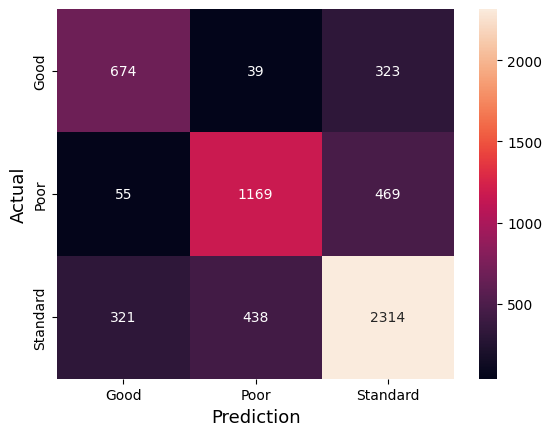

In [231]:
#confusion matrix
cm = confusion_matrix(y_test,test_pred1)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Good','Poor','Standard'],
            yticklabels=['Good','Poor','Standard'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.show()

In [232]:
#classification report
print(classification_report(y_test,test_pred1))

              precision    recall  f1-score   support

           0       0.64      0.65      0.65      1036
           1       0.71      0.69      0.70      1693
           2       0.75      0.75      0.75      3073

    accuracy                           0.72      5802
   macro avg       0.70      0.70      0.70      5802
weighted avg       0.72      0.72      0.72      5802



In [237]:
#saving final model by pickling
import pickle
with open('model.pkl','wb') as model_file:
  pickle.dump(dt_clf1,model_file)